In [11]:
import kwant
import tinyarray
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
syst = kwant.Builder()

In [13]:
a = 1
lat = kwant.lattice.square(a)

In [14]:
sigma_0 = tinyarray.array([[1, 0], [0, 1]])
sigma_x = tinyarray.array([[0, 1], [1, 0]])
sigma_y = tinyarray.array([[0, -1j], [1j, 0]])
sigma_z = tinyarray.array([[1, 0], [0, -1]])

In [16]:
L = 30
W = 10
t = 1
e_z = 0.1
alpha = 1
syst[(lat(x,y) for x in range(L) for y in range(W))] = 4*t*sigma_0 + e_z * sigma_z
syst[kwant.builder.HoppingKind((1,0),lat,lat)] = -t * sigma_0 + 1j *alpha*sigma_y/2
syst[kwant.builder.HoppingKind((0,1),lat,lat)] = -t * sigma_0 - 1j *alpha*sigma_x/2
lead = kwant.Builder(kwant.TranslationalSymmetry((-a,0)))
lead[(lat(0,j) for j in range(W))] = 4*t*sigma_0 + e_z* sigma_z
lead[kwant.builder.HoppingKind((1,0),lat,lat)] = -t*sigma_0 + 1j*alpha * sigma_y/2
lead[kwant.builder.HoppingKind((0,1),lat,lat)] = -t*sigma_0 - 1j*alpha*sigma_x/2
syst.attach_lead(lead)
syst.attach_lead(lead.reversed())

[]

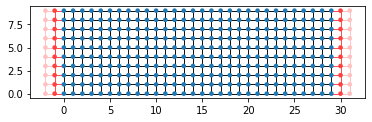

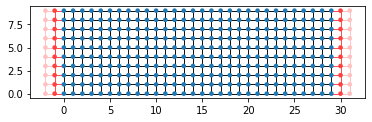

In [17]:
kwant.plot(syst)

In [18]:
syst = syst.finalized()

In [19]:
def plot_conductance(syst,energies):
    data = []
    for energy in energies:
        smatrix = kwant.smatrix(syst,energy)
        data.append(smatrix.transmission(1,0))
    plt.figure()
    plt.plot(energies,data)
    plt.xlabel("energy [t]")
    plt.ylabel("conductance [e^2/h]")
    plt.show()

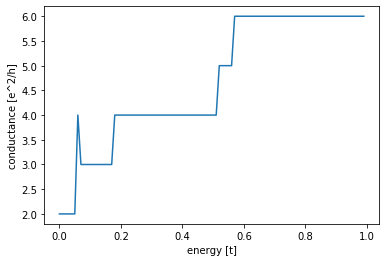

In [20]:
plot_conductance(syst,energies=[0.01*i for i in range(100)])